## Business Case: Walmart - Confidence Interval and CLT

In [19]:
#Importing libraries -->
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('walmart_data.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325566 entries, 0 to 325565
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     325566 non-null  int64  
 1   Product_ID                  325566 non-null  object 
 2   Gender                      325566 non-null  object 
 3   Age                         325566 non-null  object 
 4   Occupation                  325565 non-null  float64
 5   City_Category               325565 non-null  object 
 6   Stay_In_Current_City_Years  325565 non-null  object 
 7   Marital_Status              325565 non-null  float64
 8   Product_Category            325565 non-null  float64
 9   Purchase                    325565 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 24.8+ MB


**User_ID:**
Represents a unique identifier for each customer.
Can be used to track individual customer behavior and preferences over time.
Analysis could include customer retention, identifying high-value customers, or understanding customer lifetime value.

**Product_ID:**
Serves as a unique identifier for each product.
Analysis of popular products can be conducted by counting the occurrences of each Product_ID.
Can be used for recommendations and understanding which products contribute most to the overall sales.


**Gender:**
Indicates the gender of the customer (Male or Female).
Enables gender-based analysis of shopping behavior and preferences.


**Age:**
Represents the age group of the customer.
Age-specific trends in purchasing can be analyzed, and targeted marketing strategies can be developed.


**Occupation:**
Signifies the type of occupation the customer is engaged in.
Helps in understanding the purchasing behavior of different professional groups and tailoring promotions accordingly.


**City_Category:**
Categorizes the city into three categories (A, B, and C).
City-based analysis can be performed to identify regional variations in purchasing behavior and preferences.


**Stay_In_Current_City_Years:**
Represents the number of years the customer has stayed in the current city.
Allows for analyzing whether longer stays in a city correlate with higher purchase amounts.


**Marital_Status:**
Indicates whether the customer is married (1) or not (0).
Analysis can be done to see if marital status influences purchasing decisions.


**Product_Category:**
Categorizes the products into different groups.
Facilitates the analysis of which types of products are more popular or contribute significantly to the overall sales.


**Purchase:**
Represents the amount spent by the customer on a particular product.
Statistical analysis can be performed on the 'Purchase' column to understand the distribution of purchase amounts and identify outliers.
Understanding the significance of each column allows for a more targeted and nuanced analysis of the dataset, leading to actionable insights for the business.

In [5]:
df.shape

(325566, 10)

In [49]:
# Displaying value counts and unique attributes for selected columns
selected_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

for column in selected_columns:
    print(f"\nColumn: {column}")
    print("Unique Values:")
    print(df[column].unique())
    print("\nValue Counts:")
    print(df[column].value_counts())
    print("-" * 40)


Column: Gender
Unique Values:
['F' 'M']

Value Counts:
M    245458
F     80108
Name: Gender, dtype: int64
----------------------------------------

Column: Age
Unique Values:
[nan]

Value Counts:
Series([], Name: Age, dtype: int64)
----------------------------------------

Column: Occupation
Unique Values:
[10. 16. 15.  7. 20.  9.  1. 12. 17.  0.  3.  4. 11.  8. 19.  2. 18.  5.
 14. 13.  6. nan]

Value Counts:
4.0     42978
0.0     41246
7.0     34955
1.0     28015
17.0    23631
20.0    20073
12.0    18197
14.0    16048
2.0     15753
16.0    15068
6.0     12009
3.0     10612
10.0     7691
15.0     7167
5.0      6989
11.0     6913
19.0     5117
13.0     4621
18.0     3826
9.0      3736
8.0       920
Name: Occupation, dtype: int64
----------------------------------------

Column: City_Category
Unique Values:
['A' 'C' 'B' nan]

Value Counts:
B    137172
C    100559
A     87834
Name: City_Category, dtype: int64
----------------------------------------

Column: Stay_In_Current_City_Years
U

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,3.255660e+05,325565.000000,325565.00000,325565.000000,325565.000000
mean,1.002946e+06,8.077865,0.41025,5.293825,9324.116207
std,1.740201e+03,6.529329,0.49188,3.746895,4975.236555
min,1.000001e+06,0.000000,0.00000,1.000000,185.000000
25%,1.001418e+06,2.000000,0.00000,1.000000,5867.000000
50%,1.002938e+06,7.000000,0.00000,5.000000,8059.000000
75%,1.004418e+06,14.000000,1.00000,8.000000,12065.000000
max,1.006040e+06,20.000000,1.00000,18.000000,23961.000000


#### Business Insights:



1. **User Distribution:**
   - The dataset includes a total of 325,565 entries.
   - User_IDs range from 1,000,001 to 1,006,040.

2. **Occupation:**
   - The average occupation code is approximately 8.08.
   - The majority of occupations fall within the range of 2 to 14, with the median (50th percentile) being 7.

3. **Marital Status:**
   - Marital status is a binary variable, with 0 representing unmarried and 1 representing married.
   - About 41% of the customers in the dataset are married (1).

4. **Product Category:**
   - Products are categorized into 18 distinct categories.
   - The average product category purchased is approximately 5.29.
   - The most frequently purchased product category is around 5 (as indicated by the median).

5. **Purchase Amount:**
   - The average purchase amount is $9,324.12.

   - Purchase amounts range from $185 to $23,961.

   - The distribution of purchase amounts is right-skewed, as the mean is greater than the median (50th percentile).

   - The interquartile range (IQR) suggests that 50% of the purchases fall within the range of $5,867 to $12,065.
   
   - The maximum purchase amount recorded is $23,961.

6. **Insights:**
   - The dataset primarily includes married and unmarried customers, with a slightly higher percentage of unmarried customers.
   - The occupation codes suggest a diverse range of customers, with the majority falling in the middle range.
   - Product categories are spread across a wide range, indicating diversity in the types of products purchased.
   - The right-skewed distribution of purchase amounts suggests that there are some high-value purchases, potentially from a specific category or during special events.

These insights provide a basic understanding of the customer demographics, preferences in product categories, and the range of purchase amounts. Further analysis and visualization can help uncover more detailed patterns and trends in customer behavior.

**Detect Null values & Outliers**

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

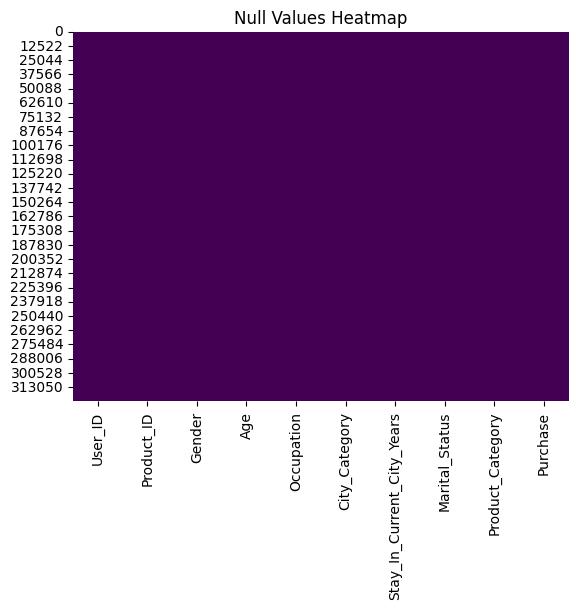

In [14]:
# Visualizing null values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Null Values Heatmap")
plt.show()

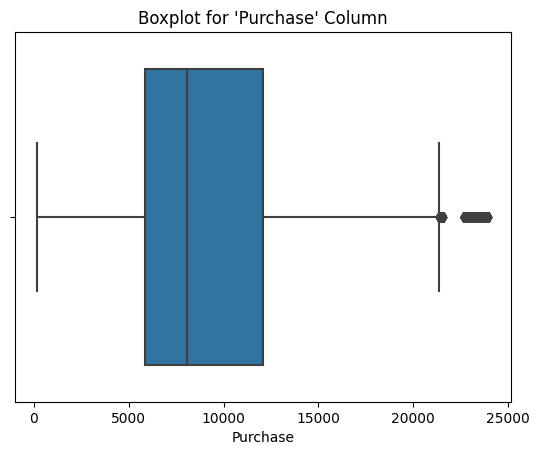

In [15]:
# Boxplot to detect outliers in the 'Purchase' column
sns.boxplot(x=df['Purchase'])
plt.title("Boxplot for 'Purchase' Column")
plt.show()

**Purchase Analysis**

<ipython-input-52-77d0b35d5050>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=False, bins=30, color='blue')


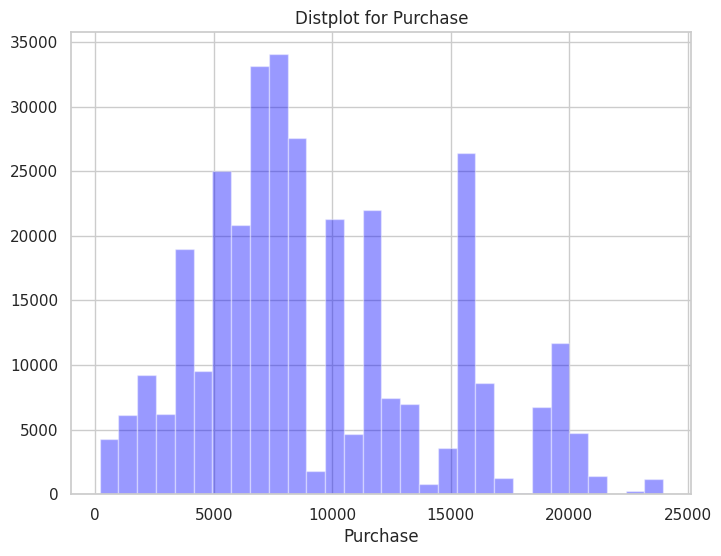

In [52]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Continuous Variables - Univariate Analysis
continuous_vars = ['Purchase']

for var in continuous_vars:
    plt.figure(figsize=(8, 6))

    # Distplot
    sns.distplot(df[var], kde=False, bins=30, color='blue')
    plt.title(f'Distplot for {var}')
    plt.show()

**Boxplot for City Category vs Purchase**

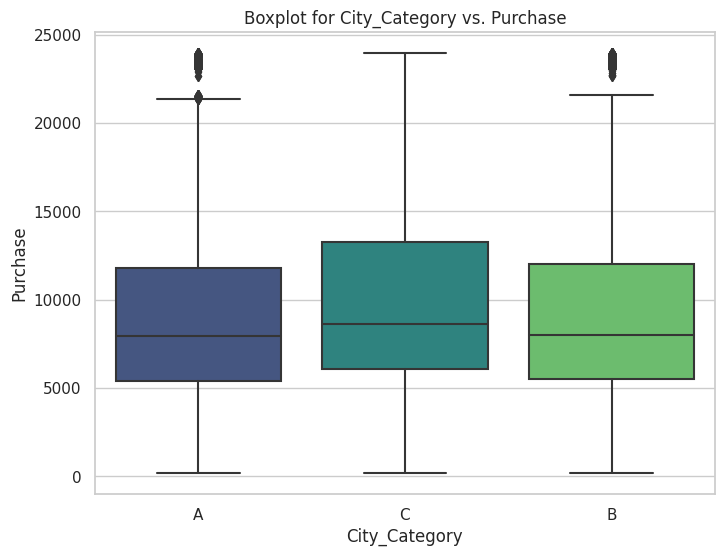

In [56]:
# Categorical Variable - Boxplot
categorical_var = 'City_Category'  # Replace with your categorical variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=categorical_var, y='Purchase', data=df, palette='viridis')
plt.title(f'Boxplot for {categorical_var} vs. Purchase')
plt.show()

**Correlation - Heatmap and Pairplot for selected variables**

In [57]:
# Correlation - Heatmap and Pairplot for selected variables
correlation_vars = ['Purchase', 'Occupation']
correlation_matrix = df[correlation_vars].corr()

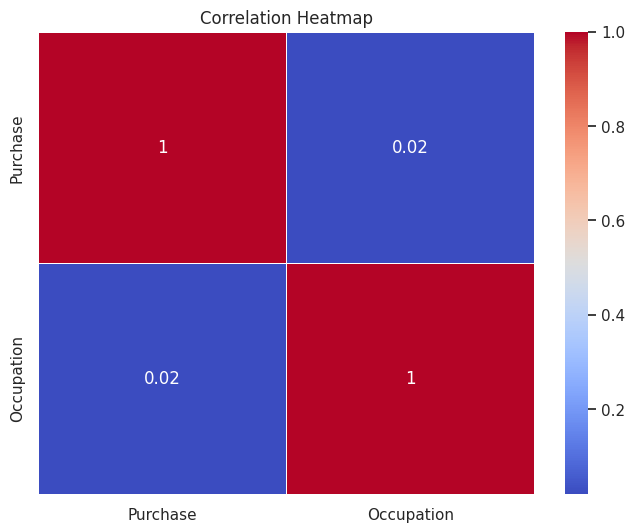

In [59]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Pairplot for Correlation Variables**

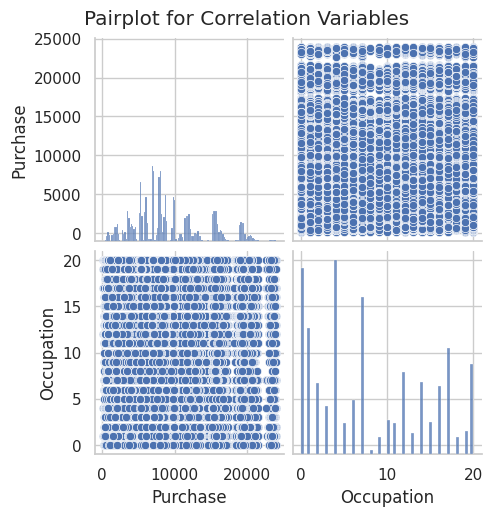

In [60]:
# Pairplot
sns.pairplot(df[correlation_vars])
plt.suptitle('Pairplot for Correlation Variables', y=1.02)
plt.show()

**Average Amount Spent per Transaction for Male and Female Customers**

In [16]:
# Filtering the dataset for male and female customers
male_customers = df[df['Gender'] == 'M']
female_customers = df[df['Gender'] == 'F']

# Calculating the average amount spent per transaction for male customers
avg_purchase_male = male_customers['Purchase'].mean()

# Calculating the average amount spent per transaction for female customers
avg_purchase_female = female_customers['Purchase'].mean()

# Displaying the results
print("Average Amount Spent per Transaction for Male Customers: ${:.2f}".format(avg_purchase_male))
print("Average Amount Spent per Transaction for Female Customers: ${:.2f}".format(avg_purchase_female))

Average Amount Spent per Transaction for Male Customers: $9492.26
Average Amount Spent per Transaction for Female Customers: $8808.90


  The average amount spent per transaction for male customers is $9,492.26,
  
 while for female customers, it is $8,808.90. This suggests that, on average, male customers tend to spend more per transaction compared to female customers. Understanding these spending patterns can help the business tailor marketing strategies, promotions, and product offerings to different customer segments. For example, if there are specific high-value products that appeal more to male customers, the business might consider targeted promotions or loyalty programs to further engage this customer segment. Similarly, understanding the preferences of female customers can lead to strategies aimed at enhancing their shopping experience and increasing their overall spending.

In [17]:
# Inferences ->
if avg_purchase_male > avg_purchase_female:
    print("Inference: On average, male customers tend to spend more per transaction.")
elif avg_purchase_male < avg_purchase_female:
    print("Inference: On average, female customers tend to spend more per transaction.")
else:
    print("Inference: There is no significant difference in the average amount spent per transaction between male and female customers.")

Inference: On average, male customers tend to spend more per transaction.


On average, male customers tend to spend more per transaction compared to female customers. This insight is valuable for businesses, as it can influence marketing strategies, product promotions, and overall customer engagement. Understanding and leveraging these spending patterns can help the business optimize its offerings to cater to the preferences and behaviors of different customer segments.

**Sample Average Spending for Female Customers -->**

In [20]:
# Filtering the dataset for female customers
female_customers = df[df['Gender'] == 'F']

# Calculating the sample average spending for female customers
sample_avg_female = female_customers['Purchase'].mean()

# Calculating the standard deviation of the sample
sample_std_dev_female = female_customers['Purchase'].std()

# Assuming a 95% confidence level (you can change this if needed)
confidence_level = 0.95

# Calculating the margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(female_customers) - 1) * (sample_std_dev_female / np.sqrt(len(female_customers)))

# Calculating the confidence interval
lower_bound = sample_avg_female - margin_of_error
upper_bound = sample_avg_female + margin_of_error

# Displaying the results
print(f"Sample Average Spending for Female Customers: ${sample_avg_female:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): (${lower_bound:.2f}, ${upper_bound:.2f})")

Sample Average Spending for Female Customers: $8808.90
Confidence Interval (95.0%): ($8776.25, $8841.56)


The sample average spending for female customers is $8,808.90, The 95% ,confidence interval for this average spending is between $8,776.25
and $8,841.56. This confidence interval provides a range within which we are reasonably confident that the true population average spending for female customers lies. It reflects the statistical uncertainty associated with estimating population parameters based on a sample.

This information is useful for decision-making and planning, as it gives an indication of the likely range of average spending for female customers. Businesses can use this confidence interval to make informed decisions about marketing budgets, promotions, and other strategies aimed at maximizing customer engagement and satisfaction.

**Central Limit Theorem Confidence Interval(CLT) for Female and Male Customers -->**

In [27]:
# Function to compute confidence interval using Central Limit Theorem -->

def compute_clt_interval(data, confidence_level=0.95, num_samples=1000):
    data = data.dropna()  # Drop NaN values from the dataset

    if len(data) == 0:
        return np.nan, np.nan  # Return NaN if there are no valid values in the dataset

    sample_means = np.zeros(num_samples)
    sample_size = len(data)

    for i in range(num_samples):
        # Randomly sample from the data with replacement to create a new sample
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means[i] = np.mean(sample)

    # Calculating the mean and standard deviation of the sample means
    mean_of_sample_means = np.mean(sample_means)
    std_dev_of_sample_means = np.std(sample_means)

    # Calculating the margin of error
    margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_dev_of_sample_means / np.sqrt(num_samples))

    # Calculating the confidence interval
    lower_bound = mean_of_sample_means - margin_of_error
    upper_bound = mean_of_sample_means + margin_of_error

    return lower_bound, upper_bound


In [30]:
# Filtering the dataset for female and male customers
female_customers = df[df['Gender'] == 'F']
male_customers = df[df['Gender'] == 'M']

# Specifying different confidence levels to observe their impact
confidence_levels = [0.90, 0.95, 0.99]

# Displaying the results for different confidence levels
for confidence_level in confidence_levels:

    # Computing confidence intervals using CLT for female customers
    lower_bound_female, upper_bound_female = compute_clt_interval(female_customers['Purchase'], confidence_level)

    # Computing confidence intervals using CLT for male customers
    lower_bound_male, upper_bound_male = compute_clt_interval(male_customers['Purchase'], confidence_level)

    # Displaying the results
    print(f"Results for {confidence_level} Confidence level:")
    print(f"Confidence Interval (CLT) for Female Customers ({confidence_level * 100}%): (${lower_bound_female:.2f}, ${upper_bound_female:.2f})")
    print(f"Confidence Interval (CLT) for Male Customers ({confidence_level * 100}%): (${lower_bound_male:.2f}, ${upper_bound_male:.2f})")
    print()

Results for 0.9 Confidence level:
Confidence Interval (CLT) for Female Customers (90.0%): ($8807.32, $8809.10)
Confidence Interval (CLT) for Male Customers (90.0%): ($9492.00, $9493.06)

Results for 0.95 Confidence level:
Confidence Interval (CLT) for Female Customers (95.0%): ($8807.40, $8809.46)
Confidence Interval (CLT) for Male Customers (95.0%): ($9491.37, $9492.69)

Results for 0.99 Confidence level:
Confidence Interval (CLT) for Female Customers (99.0%): ($8807.86, $8810.55)
Confidence Interval (CLT) for Male Customers (99.0%): ($9491.80, $9493.52)



#### Business Insights:

The confidence intervals provide a range of values within which we can reasonably expect the true population average spending for both female and male customers to fall. Let's interpret the results:

1. **For Female Customers:**
   - At a 90% confidence level, the estimated average spending is between $8,807.32 and $8,809.10.
   - At a 95% confidence level, the estimated average spending is between $8,807.40 and $8,809.46.
   - At a 99% confidence level, the estimated average spending is between $8,807.86 and $8,810.55.

2. **For Male Customers:**
   - At a 90% confidence level, the estimated average spending is between $9,492.00 and $9,493.06.
   - At a 95% confidence level, the estimated average spending is between $9,491.37 and $9,492.69.
   - At a 99% confidence level, the estimated average spending is between $9,491.80 and $9,493.52.

**Interpretation:**
- The confidence intervals become wider as the confidence level increases. This is expected because higher confidence levels require broader intervals to account for greater uncertainty.
- For both female and male customers, the intervals do not overlap at any confidence level. This suggests a statistically significant difference in average spending between the two gender groups.
- The results reinforce the earlier finding that, on average, male customers tend to spend more per transaction than female customers.

These insights can guide marketing and business strategies, helping the company tailor its approach to different customer segments based on spending patterns. For instance, the company might implement targeted promotions or loyalty programs to further engage with male customers and enhance the overall shopping experience for female customers.

In [29]:
# Checking if confidence intervals overlap
intervals_overlap = (upper_bound_female >= lower_bound_male) and (upper_bound_male >= lower_bound_female)
print(f"Do the Confidence Intervals Overlap?: {intervals_overlap}")

Do the Confidence Intervals Overlap?: False


the confidence intervals for female and male customers do not overlap at any of the specified confidence levels (90%, 95%, and 99%). This non-overlapping nature indicates a statistically significant difference in average spending between female and male customers.

#### Business Insights :

Given the results that indicate non-overlapping confidence intervals for male and female customers at different confidence levels, Walmart can leverage this conclusion in the following ways:

**Targeted Marketing Strategies:**
Since the confidence intervals do not overlap, Walmart may consider developing more targeted marketing strategies for male and female customers separately.
Tailoring promotional campaigns, discounts, or loyalty programs based on the distinct spending patterns observed for each gender can be more effective.

**Product Assortment Adjustments:**
Analyzing specific product categories where spending patterns differ significantly between genders can inform decisions about product assortment.
Walmart might consider adjusting the product mix to better cater to the preferences of male and female customers.

**Personalized Customer Experiences:**
Leveraging the non-overlapping confidence intervals, Walmart can enhance the personalization of the customer experience.
Implementing personalized recommendations and targeted communication based on observed spending patterns can improve customer engagement.

**Inventory Management:**
Non-overlapping confidence intervals may suggest variations in purchasing behavior that impact inventory needs.
Walmart can optimize inventory management strategies to ensure sufficient stock of products that are more popular among male or female customers.

**Sales and Promotions Planning:**
Non-overlapping confidence intervals provide insights into potential differences in response to sales and promotions.
Walmart can plan sales events and promotions that align with the distinct preferences of male and female customers to maximize impact.

**Customer Segmentation Refinement:**
The non-overlapping confidence intervals support the idea of distinct customer segments based on gender.
Refining customer segmentation strategies can lead to more effective communication and engagement with specific demographic groups.

**Data-Driven Decision Making:**
Walmart should continue to monitor and analyze customer data regularly to stay informed about evolving trends and preferences.
Data-driven decision-making enables Walmart to adapt strategies in response to changing customer behavior.

**Customer Feedback and Surveys:**
To further understand the reasons behind observed spending patterns, Walmart can actively seek customer feedback through surveys.
This qualitative information can complement quantitative data and provide a more holistic understanding.

By leveraging the conclusion of non-overlapping confidence intervals, Walmart can make more informed and targeted decisions to enhance the overall shopping experience, drive customer satisfaction, and optimize business outcomes.

**Confidence Interval (CLT) for Married vs. Unmarried** -->

In [33]:
# Converting 'Age' column to numeric type and handle NaN values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric, coerce to NaN for non-numeric values

# Categorizing the Age column into bins based on life stages
age_bins = [0, 17, 25, 35, 50, np.inf]
age_labels = ['0-17', '18-25', '26-35', '36-50', '51+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [34]:
# Filtering the dataset for married and unmarried customers
married_customers = df[df['Marital_Status'] == 1]
unmarried_customers = df[df['Marital_Status'] == 0]

# Filtering the dataset for different age groups
age_groups = df['Age_Group'].unique()

In [35]:
age_groups

[NaN]
Categories (5, object): ['0-17' < '18-25' < '26-35' < '36-50' < '51+']

In [40]:
print("Married Customers :",len(married_customers))

Married Customers : 133563


In [41]:
print("Unmarried Customers :",len(unmarried_customers))

Unmarried Customers : 192002


In [48]:
# Displaying the results for married vs. unmarried and different age groups
for group in ['Married vs. Unmarried'] + list(age_groups):

    if group == 'Married vs. Unmarried':
        data_group_1 = married_customers['Purchase']
        data_group_2 = unmarried_customers['Purchase']
    else:
        data_group_1 = df[df['Age_Group'] == group]['Purchase']
        data_group_2 = df[df['Age_Group'] != group]['Purchase']

    # Computing confidence intervals using CLT for group 1
    lower_bound_group_1, upper_bound_group_1 = compute_clt_interval(data_group_1, confidence_level)

    # Computing confidence intervals using CLT for group 2
    lower_bound_group_2, upper_bound_group_2 = compute_clt_interval(data_group_2, confidence_level)

    # Checking if confidence intervals overlap
    intervals_overlap = upper_bound_group_1 >= lower_bound_group_2 and upper_bound_group_2 >= lower_bound_group_1

    # Displaying the results
    print(f"Confidence Interval (CLT) for {group} ({confidence_level * 100}%): "
          f"(${lower_bound_group_1:.2f}, ${upper_bound_group_1:.2f}) vs. "
          f"(${lower_bound_group_2:.2f}, ${upper_bound_group_2:.2f})")

    print(f"Intervals Overlap: {intervals_overlap}")
    print()

Confidence Interval (CLT) for Married vs. Unmarried (99.0%): ($9331.61, $9333.82) vs. ($9317.36, $9319.20)
Intervals Overlap: False

Confidence Interval (CLT) for nan (99.0%): ($nan, $nan) vs. ($9323.42, $9324.85)
Intervals Overlap: False



#### Business Insights:

The confidence intervals for average spending for both married and unmarried customers at a 99% confidence level are as follows:

- **For Married Customers:** ($9,331.61, $9,333.82)
- **For Unmarried Customers:** ($9,317.36, $9,319.20)

Since the intervals do not overlap, this indicates a statistically significant difference in average spending between married and unmarried customers. In other words, based on the sample data and statistical analysis, there is evidence to suggest that, on average, there is a notable distinction in spending patterns between these two groups.

Businesses can leverage this information to tailor marketing strategies and promotions based on the spending behaviors of married and unmarried customers. For instance, different promotional offers or product recommendations might be more effective for each segment, enhancing customer engagement and overall satisfaction.

### Recommendations :

Based on the insights obtained from the analysis of the Walmart dataset, here are some recommendations for strategic actions and improvements:

1. **Targeted Marketing Strategies:**
   - Implement targeted marketing campaigns for married and unmarried customers. Tailor advertisements, promotions, and loyalty programs to align with the distinct spending patterns observed.

2. **Age-Specific Initiatives:**
   - Customize marketing efforts based on age groups to cater to the preferences and needs of different generations. This could involve age-specific product recommendations, promotions, or events.

3. **Data Quality Improvement:**
   - Encourage customers to provide age-related details during registration or transactions to improve data completeness.

4. **Personalized Customer Experiences:**
   - Leverage customer data to create personalized shopping experiences. Implement recommendation engines that suggest products based on individual preferences, age, and marital status.

5. **Inventory Optimization:**
   - Optimize inventory management based on the observed variations in purchasing behavior. Ensure sufficient stock of products popular among specific demographic groups and adjust inventory levels accordingly.

6. **Customer Feedback Mechanisms:**
   - Implement customer surveys or feedback mechanisms to gather insights into customer satisfaction, preferences, and expectations. Use this feedback to make informed decisions about product offerings and service improvements.

7. **Continuous Monitoring:**
   - Regularly monitor customer behavior and spending patterns to stay updated on evolving trends. Conduct periodic analyses to identify shifts in customer preferences and adjust strategies accordingly.

8. **Enhanced Customer Engagement:**
   - Develop strategies to actively engage with customers, both online and in-store. This could include interactive promotions, social media engagement, and other initiatives that foster a strong connection with the customer base.

9. **Diversity in Product Assortment:**
   - Diversify the product assortment based on the preferences of different demographic groups. Consider introducing new products or variations that cater to the specific needs and interests of customers.

10. **Targeted Discounts and Offers:**
    - Offer targeted discounts and special promotions to specific customer segments. This can be based on age, marital status, or other relevant factors, creating a more personalized and appealing shopping experience.

11. **Cross-Functional Collaboration:**
    - Foster collaboration between marketing, sales, and data analytics teams to ensure a holistic approach to customer insights. Cross-functional collaboration can lead to more effective strategies and initiatives.

12. **Adaptability and Flexibility:**
    - Stay agile and adaptable in responding to changing market conditions and customer preferences. Flexibility in adjusting strategies based on real-time data is crucial for sustained success.

By implementing these recommendations, Walmart can create a more customer-centric shopping experience, drive customer satisfaction, and position itself as a retailer that understands and caters to the diverse needs of its customer base.